<a href="https://colab.research.google.com/github/Gopichand04/Hackthon_ds_easy/blob/main/Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

df=pd.read_csv('/content/sentiment_dataset (2) (1).csv',encoding="latin-1")
df


,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
75972,0,1695407913,Mon May 04 06:03:34 PDT 2009,NO_QUERY,dhaywardhughes,@hayleykitkat You poor girl
75973,0,1695408216,Mon May 04 06:03:36 PDT 2009,NO_QUERY,Stephano_x,My bum is not lovin life right now
75974,0,1695408247,Mon May 04 06:03:37 PDT 2009,NO_QUERY,danalar,noooo! my bro is 3 years younger than me &amp...
75975,0,1695408727,Mon May 04 06:03:41 PDT 2009,NO_QUERY,DanShentonLives,@dontlookaway no i was workin all day. You?


In [2]:
df1=df.loc[:4000]
df1.shape

(4001, 6)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75977 entries, 0 to 75976
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        75977 non-null  int64 
 1   id         75977 non-null  int64 
 2   timestamp  75977 non-null  object
 3   query      75977 non-null  object
 4   username   75977 non-null  object
 5   tweet      75977 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.5+ MB


In [4]:
df.isnull().sum()


val          0
id           0
timestamp    0
query        0
username     0
tweet        0
dtype: int64

In [5]:
df.duplicated().sum()


0

In [6]:
df.describe()


,val,id
count,75977.0,7.597700e+04
mean,0.0,1.606564e+09
std,0.0,7.702532e+07
min,0.0,1.467810e+09
25%,0.0,1.556743e+09
50%,0.0,1.573143e+09
75%,0.0,1.685550e+09
max,0.0,1.695409e+09


In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
def tweet_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    tokens = word_tokenize(tweet)
    text = ' '.join(tokens)
    sentiment_scores = sid.polarity_scores(text)
    score = sentiment_scores['compound']
    if score >= 0.05:
        sentiment = 'Positive'
    elif score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment
df1['Sentiment'] = df1['tweet'].apply(tweet_sentiment)

<ipython-input-8-b40b9723b5dc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['tweet'].apply(tweet_sentiment)


In [9]:
df1['Sentiment'].isnull().sum()
df['Sentiment']=None

In [13]:
df2=df.loc[4001:]


In [15]:
df3 = pd.concat([df1, df2], ignore_index=True)


In [16]:
df3

,val,id,timestamp,query,username,tweet,Sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative
...,...,...,...,...,...,...,...
75972,0,1695407913,Mon May 04 06:03:34 PDT 2009,NO_QUERY,dhaywardhughes,@hayleykitkat You poor girl,None
75973,0,1695408216,Mon May 04 06:03:36 PDT 2009,NO_QUERY,Stephano_x,My bum is not lovin life right now,None
75974,0,1695408247,Mon May 04 06:03:37 PDT 2009,NO_QUERY,danalar,noooo! my bro is 3 years younger than me &amp...,None
75975,0,1695408727,Mon May 04 06:03:41 PDT 2009,NO_QUERY,DanShentonLives,@dontlookaway no i was workin all day. You?,None


In [17]:
df3.isnull().sum()


val              0
id               0
timestamp        0
query            0
username         0
tweet            0
Sentiment    71976
dtype: int64

In [18]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75977 entries, 0 to 75976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        75977 non-null  int64 
 1   id         75977 non-null  int64 
 2   timestamp  75977 non-null  object
 3   query      75977 non-null  object
 4   username   75977 non-null  object
 5   tweet      75977 non-null  object
 6   Sentiment  4001 non-null   object
dtypes: int64(2), object(5)
memory usage: 4.1+ MB


In [19]:
for i in df3.select_dtypes('object').columns:
    df3[i]=df3[i].fillna(df3[i].mode()[0])

In [20]:
encoder = LabelEncoder()
col = ['timestamp','query','username','tweet','Sentiment']
for i in col:
  df3[i] = encoder.fit_transform(df3[i])
df3['Sentiment'].unique()

array([0, 2, 1])

In [21]:
df3.describe()


,val,id,timestamp,query,username,tweet,Sentiment
count,75977.0,7.597700e+04,75977.000000,75977.0,75977.000000,75977.000000,75977.000000
mean,0.0,1.606564e+09,31030.223607,0.0,30610.853192,37659.170631,0.045645
std,0.0,7.702532e+07,17901.092236,0.0,17651.643545,21748.090692,0.274569
min,0.0,1.467810e+09,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,1.556743e+09,15589.000000,0.0,15355.000000,18808.000000,0.000000
50%,0.0,1.573143e+09,30925.000000,0.0,30648.000000,37643.000000,0.000000
75%,0.0,1.685550e+09,46739.000000,0.0,46035.000000,56521.000000,0.000000
max,0.0,1.695409e+09,62135.000000,0.0,60845.000000,75331.000000,2.000000


In [22]:
from scipy.stats import zscore
col = ['timestamp','username','tweet']
for i in col:
  df3[i]=zscore(df3[i])

In [23]:
df3.drop(['query','val'],inplace=True,axis=1)


In [24]:
df3

,id,timestamp,username,tweet,Sentiment
0,1467810369,-1.532666,-0.491621,-0.598271,0
1,1467810672,-1.532611,1.267094,1.273905,0
2,1467810917,-1.532555,0.802772,-1.461939,2
3,1467811184,-1.532499,-1.399701,1.405320,0
4,1467811193,-1.532499,-1.160061,-0.765092,0
...,...,...,...,...,...
75972,1695407913,-0.876780,0.010659,-0.999412,0
75973,1695408216,-0.876725,-0.650700,0.301124,0
75974,1695408247,-0.876669,-0.038232,1.423161,0
75975,1695408727,-0.876613,-1.463774,-1.070868,0


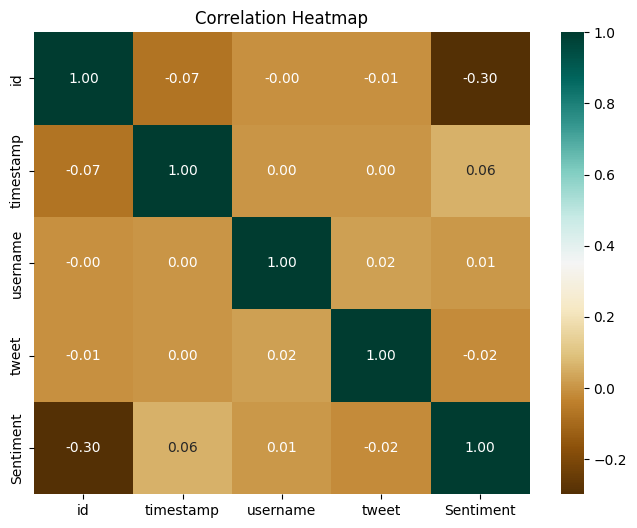

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df3.corr(), annot=True, cmap='BrBG' ,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
selected_features =['timestamp','username','tweet']
X = df3[selected_features]
y = df3['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.971703079757831

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14766
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       221

    accuracy                           0.97     15196
   macro avg       0.32      0.33      0.33     15196
weighted avg       0.94      0.97      0.96     15196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
